In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [5]:
import networkx as nx
from graph2plan.fourtp.four_complete import graph_to_four_complete
from graph2plan.fourtp.faces import get_external_face
from graph2plan.dcel.original import create_embedding
from graph2plan.fourtp.tests import get_shortcuts

In [4]:
def create_G_and_pos(_G):
    G = nx.convert_node_labels_to_integers(_G)
    pos = {name: curr_pos for name, curr_pos in zip(G.nodes, _G.nodes)}
    nx.draw_networkx(G, pos)
    return G, pos

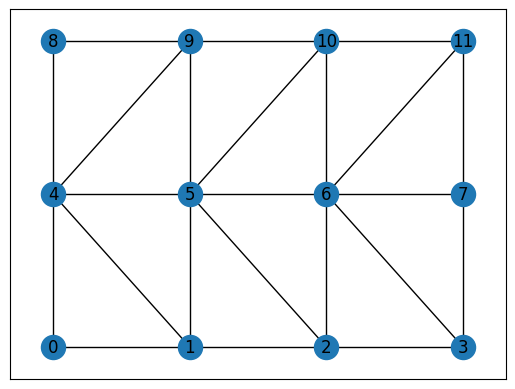

In [7]:
G, pos = create_G_and_pos(nx.triangular_lattice_graph(2,6))

In [10]:
shortcuts, outer_face = get_shortcuts(G, pos)
shortcuts, outer_face

([(1, 4), (4, 9)], [0, 1, 2, 3, 7, 11, 10, 9, 8, 4])

In [14]:
G_outer = nx.cycle_graph(outer_face, nx.Graph)
nx.shortest_path(G_outer, 4,9)

[4, 8, 9]

==>> shortcuts: [(1, 4), (4, 9)]
[(1, 0), (0, 1)]
(0.5, 0.5)
[(0, 1), (1, 2)]
(0.5, 1.5)
Graph is NOT 4-connected!!


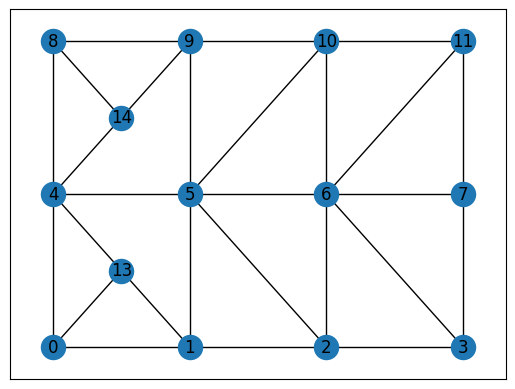

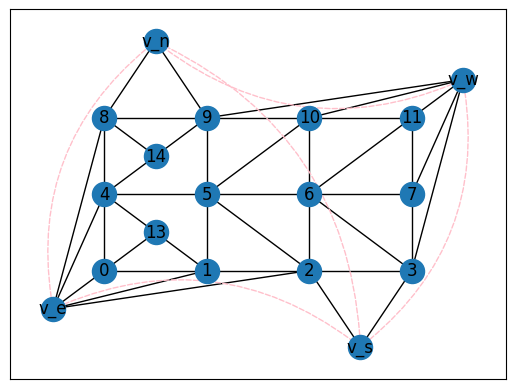

In [23]:
G2,full_pos = graph_to_four_complete(G, pos)
G2


In [25]:
for n in G2.nodes:
    print(n, G2.degree(n))

0 4
1 5
2 6
3 5
4 6
5 6
6 6
7 4
8 5
9 6
10 5
11 4
13 3
14 3
v_e 7
v_s 5
v_w 7
v_n 5


In [18]:
G2.edges

EdgeView([(0, 1), (0, 4), (0, 13), (1, 2), (1, 5), (1, 4), (1, 13), (2, 3), (2, 6), (2, 5), (3, 7), (3, 6), (4, 5), (4, 8), (4, 9), (4, 13), (4, 14), (5, 6), (5, 9), (5, 10), (6, 7), (6, 10), (6, 11), (7, 11), (8, 9), (8, 14), (9, 10), (9, 14), (10, 11)])

In [11]:
PE = create_embedding(G, pos)
PE

In [12]:
outer_face = get_external_face(PE, pos)
outer_face

[0, 1, 2, 3, 7, 11, 10, 9, 8, 4]

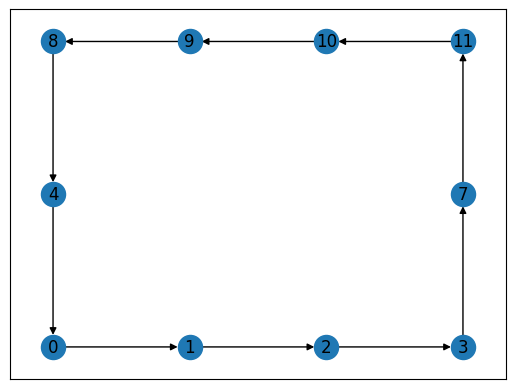

In [13]:
DG_outer = nx.cycle_graph(outer_face, nx.DiGraph)
G_outer = nx.cycle_graph(outer_face, nx.Graph)
nx.draw_networkx(DG_outer, pos)

In [16]:
nx.shortest_path(G_outer, 4,9)

[4, 8, 9]

In [65]:
u = 1
v = 4
start = list(DG_outer.successors(u))[0]
end = v
nx.shortest_path(DG_outer, start, end)


[2, 3, 7, 11, 10, 9, 8, 4]